## Load data using Pandas

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
print data.head(5)
print data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

## Clean data

In [3]:
print data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [4]:
# fill in the missing values with the median age
data["Age"] = data["Age"].fillna(data["Age"].median())

# convert female/male to numeric values (male=0, female=1)
data.loc[data["Sex"]=="male","Sex"]=0
data.loc[data["Sex"]=="female","Sex"]=1

# do the same for Embarked
print data["Embarked"].unique()

data["Embarked"] = data["Embarked"].fillna('S')
data.loc[data["Embarked"]=="S","Embarked"]=0
data.loc[data["Embarked"]=="C","Embarked"]=1
data.loc[data["Embarked"]=="Q","Embarked"]=2

print data.head(10)

['S' 'C' 'Q' nan]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1   38      1      0   
2                             Heikkinen, Miss. Laina   1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1   35      1      0   
4                           Allen, Mr. William Henry   0   35      0      0   
5                                   Moran, Mr. James   0   28      0      0   
6                            McC

## Perform linear regression

In [5]:
# import linear regression and kfold from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

# columns we'll use to predict outcome
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

# instantiate the model
linreg = LinearRegression()

# generate cross-validation folds
kf = KFold(data.shape[0], n_folds=10, random_state=1)

predictions = []
for train, test in kf:
    # load X and y
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data["Survived"].iloc[train]
    
    # fit the data
    linreg.fit(train_predictors, train_target)
    
    # cross-validate
    test_pred = linreg.predict(data[predictors].iloc[test,:])
    predictions.append(test_pred)

# print predictions (10 folds 891/10 test observations)

**Check accuracy**

In [6]:
# concatenate all 10 folds of 89 test observations
prediction = np.concatenate(predictions, axis=0) 

# map the predictions to outcomes
prediction[predictions > 0.5] = 1
prediction[prediction <= 0.5] = 0

accuracy = sum (prediction[prediction == data["Survived"]]) / len(prediction)
print accuracy

0.52861952862


/Users/JenniferHwang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
/Users/JenniferHwang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


## LogisticRegression for better accuracy

In [7]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg=LogisticRegression(random_state=1)

from sklearn.cross_validation import cross_val_score
print cross_val_score(logreg, data[predictors], data["Survived"], cv=10, scoring='accuracy').mean()

0.79354102826


## Test the data on a testing set (specifically for Kaggle)

In [8]:
test = pd.read_csv('test.csv')

# clean data
test["Age"] = test["Age"].fillna(data["Age"].median())

test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1

test["Embarked"] = test["Embarked"].fillna('S')
test.loc[test["Embarked"]=="S","Embarked"]=0
test.loc[test["Embarked"]=="C","Embarked"]=1
test.loc[test["Embarked"]=="Q","Embarked"]=2

test["Fare"] = test["Fare"].fillna(test["Fare"].median())

logreg.fit(data[predictors],data["Survived"])

prediction = logreg.predict(test[predictors])


# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

print submission
#write to a csv file

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
3

## Logistic Regression -- random forests
Average of many decision trees

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have 
#  at the place where a tree branch ends (the bottom points of the tree)
ranforest = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
prediction = cross_val_score(ranforest, data[predictors], data["Survived"], cv=3)
print prediction.mean()

0.800224466891


- Having more trees will **increase** the accuracy
- *increasing* min_samples_spplit and min_samples_leaf will **reduce** overfitting by creating a less deep tree

In [10]:
ranforest = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
prediction = cross_val_score(ranforest, data[predictors], data["Survived"], cv=3)
print prediction.mean()

0.819304152637


**Creating new features**
- Namelength : could be correlated with their wealth, and thus their position in the Titanic
- Total family members : sibsp+parch

In [11]:
# Generating a familysize column
data["FamilySize"] = data["SibSp"] + data["Parch"]

# The .apply method generates a new series (for pands)
data["NameLength"] = data["Name"].apply(lambda x: len(x))

#print map(lambda x: len(x), data["Name"])

**Using regular expression to map titles to numeric values**

In [12]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.
    #  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = data["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, \
                 "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8,\
                 "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
data["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
dtype: int64


In [13]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = data.apply(get_family_id, axis=1)

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[data["FamilySize"] < 3] = -1

# Print the count of each unique id.
print(pd.value_counts(family_ids))

data["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


## Feature Engineering using SelectKBest

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

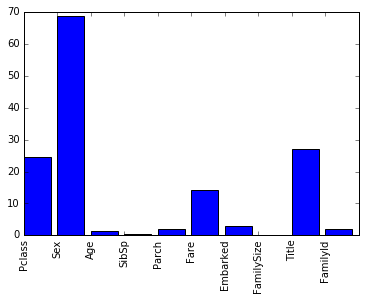

0.835090228124


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(data[predictors], data["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

ranforest = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
prediction = cross_val_score(ranforest, data[predictors], data["Survived"], cv=10)
print prediction.mean()